<a href="https://colab.research.google.com/github/prakharsrivastava/powerbi/blob/main/Data_Science_on_Google_Cloud_Platform_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive

drive.mount('/content/gdrive')
%cd /content/gdrive/MyDrive/chapter2/


Mounted at /content/gdrive
/content/gdrive/MyDrive/chapter2


In [33]:
%load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [34]:
%%sql
sqlite:///mydb_

'Connected: @mydb_'

In [94]:
%%shell
cat contingency.sql |
sed 's/DEP_DELAY_THRESH/20/g'  | sed 's/ARR_DELAY_THRESH/-30/g' > sql_.sql

In [95]:
cat sql_.sql

SELECT 
      case when dep_delay <= 20 AND arr_delay < -30  then count(dest) end  AS true_positives,
        case  when dep_delay < 20 AND arr_delay >= -30 then count(dest) end AS false_positives,
       case  when dep_delay >= 20 AND arr_delay < -30 then count(dest) end AS false_negatives,
        case  when dep_delay >= 20 AND arr_delay >= -30 then count(dest) end AS true_negatives,
    COUNT(*) AS total
FROM flights_view
WHERE arr_delay IS NOT NULL AND dep_delay IS NOT NULL

In [96]:

import sqlite3

qry = open('sql_.sql', 'r').read()
conn = sqlite3.connect('mydb_')
c = conn.cursor()
res=c.execute(qry)
conn.commit()


for row in res:
    print(*row, sep='\t')

c.close()
conn.close()

None	457013	None	None	457013


In [98]:
import pandas as pd
dataframe = pd.read_sql("""
            SELECT *
            FROM flights_view
            
            """, con = sqlite3.connect('mydb_'))
# return your first five rows
dataframe.head()

,FL_DATE,UNIQUE_CARRIER,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,DEST_AIRPORT_SEQ_ID,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,DIVERTED,Distance
0,2015-01-01,AA,1247802,JFK,1289203,LAX,900,855.0,-5.0,17.0,912.0,1230.0,7.0,1230,1237.0,7.0,0,0,2475.0
1,2015-01-02,AA,1247802,JFK,1289203,LAX,900,850.0,-10.0,15.0,905.0,1202.0,9.0,1230,1211.0,-19.0,0,0,2475.0
2,2015-01-03,AA,1247802,JFK,1289203,LAX,900,853.0,-7.0,15.0,908.0,1138.0,13.0,1230,1151.0,-39.0,0,0,2475.0
3,2015-01-04,AA,1247802,JFK,1289203,LAX,900,853.0,-7.0,14.0,907.0,1159.0,19.0,1230,1218.0,-12.0,0,0,2475.0
4,2015-01-05,AA,1247802,JFK,1289203,LAX,900,853.0,-7.0,27.0,920.0,1158.0,24.0,1230,1222.0,-8.0,0,0,2475.0


In [100]:
import pandas as pd
sqlpath = 'sql_.sql'
scriptFile = open(sqlpath,'r')
script = scriptFile.read()

dataframe = pd.read_sql(script, con = sqlite3.connect('mydb_'))
# return your first five rows
dataframe.head()

,true_positives,false_positives,false_negatives,true_negatives,total
0,None,457013,None,None,457013


In [107]:
import pandas as pd
dataframe = pd.read_sql("""
            SELECT *
            FROM flights_view 
            
            """, con = sqlite3.connect('mydb_'))
# return your first five rows
dataframe.head()
dataframe.to_csv("mydata.csv", sep='\t')

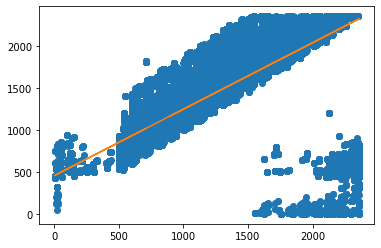

In [103]:
import matplotlib.pyplot as plt
import numpy as np
x=dataframe["CRS_DEP_TIME"]
y=dataframe["CRS_ARR_TIME"]
#create basic scatterplot
plt.plot(x, y, 'o')

#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(x, y, 1)

#add linear regression line to scatterplot 
plt.plot(x, m*x+b)